# Introduzione
Un automa cellulare è un sistema fisico discreto, costituito da un reticolo $d$-dimensionale di cellule. Ogni cellula può assumere uno stato $s$, il quale evolve nel tempo secondo una regola di evoluzione locale. Tutte le cellule dell'automa evolvono in maniera sincrona a ogni passo temporale discreto. 
Di seguito, studieremo gli automi cellulari unidimensionali, soffermandoci sugli automi elementari e sulle caratteristiche delle varie regole di evoluzione. Il modello è apparentemente semplice, ma la sua dinamica è estremamente ricca. Vedremo di seguito l'emergere di configurazioni finali con strutture complesse; la loro presenza permette di affermare che gli automi cellulari sono capaci di auto organizzazione. 

Il modello, proposto da von Neumann e Ulam nel 1948, presenta applicazioni in numerosi ambiti. In particolare, con esso è possibile modellare il comportamento di qualunque sistema fisico su un reticolo, con componenti elementari descritte da uno stato (*e.g.* modello di Ising). In ambito biologico, è possibile studiare i particolari pattern manifestati da certi esseri viventi (*e.g.* le strutture triangolari sulla conchiglia di *Conus textile*), oltre a una vasta classe di fenomeni di crescita.

# Algoritmo
## Generalità
Consideriamo un sistema unidimensionale di $N$ **cellule** (o siti); nel caso più generale possibile, ognuna di esse può assumere $k$ **stati** discreti diversi $s \in \{0, 1, \dots, k-2, k-1\}$. L'evoluzione temporale del sistema è determinata da una **regola**, solitamente codificata da un numero decimale. In generale, la regola di evoluzione è locale; lo stato delle cellule del sistema al tempo $t+dt$ è determinato dallo stato dell'**intorno** di ogni cellula al tempo $t$, contenente $2z+1$ siti. In particolare, l'evoluzione è simultanea per tutti i siti del sistema.

Individuiamo due classi di regole di evoluzione nel tempo (discreto) del sistema. Per le regole **non totalistiche**, lo stato della cellula al tempo $t+dt$ è determinato dalla configurazione degli stati nell'intorno della cellula al tempo $t$; per le regole **totalistiche**, lo stato della cellula al tempo $t+dt$ è determinato dalla somma degli stati nell'intorno della cellula al passo precedente. In generale, il numero di regole non totalistiche possibili è dato da $N_\text{regole} = k^{k^{(2z+1)}}$; il numero di regole totalistiche è $k^{((k-1)(2z+1))+1} = k^{k+2z(k-1)}$.

Un caso particolare è dato dagli *automi cellulari elementari*, i quali possono assumere $k = 2$ stati, ed evolvono secondo regole (non totalistiche) limitate ai primi vicini della cellula, *i.e.* con $z = 1$. In questo caso, le possibili configurazioni degli intorni di una cellula sono $2^3 = 8$; inoltre, sono possibili $2^{2^3} = 2^8 = 256$ regole di evoluzione non totalistiche.

Intorni | 111 | 110 | 101 | 100 | 011 | 010 | 001 | 000
--------|-----|-----|-----|-----|-----|-----|-----|-----

Secondo la notazione di Wolfram, ogni regola di evoluzione è contrassegnata da un **codice** decimale. La rappresentazione in base $k$ del codice rappresenta la tabella delle regole per ogni possibile configurazione dell'intorno della cellula. 
Prendiamo come esempio la regola non totalistica 90 per un automa cellulare elementare. La rappresentazione binaria del numero è $1011010$; ognuna delle cifre della rappresentazione binaria corrisponde alla regola di evoluzione della cellula centrale di un dato intorno.

Intorni             | 111 | 110 | 101 | 100 | 011 | 010 | 001 | 000
:------------------:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:
Bit della regola 90 | 0   | 1   | 0   | 1   | 1   | 0   | 1   | 0

## Dimensione frattale
Come discuteremo di seguito, alcune regole danno luogo a figure frattali. Un **frattale** è una figura geometrica caratterizzata dall'**auto similarità**; presa qualunque regione della figura, a qualunque scala, essa è simile alla totalità della figura stessa. In altre parole, una figura è autosimile se le sue parti più piccole o dettagliate hanno una forma o una struttura simile o identica alla totalità dell'oggetto.

La **dimensione frattale** di una figura è la generalizzazione del concetto di dimensione euclidea; a differenza di quest'ultima, essa può assumere valori non interi, ed è indice della complessità e auto similarità della figura esaminata. Un algoritmo per il calcolo della dimensione frattale è il **box counting**. Collochiamo la figura su una griglia e contiamo il numero di celle (*scatole*) $N_\text{box}(l)$ necessario per ricoprire interamente la figura stessa. La procedura è ripetuta rendendo la griglia più fitta, ovvero riducendo il lato $l$ della singola cella. La dimensione frattale della figura è data da
$$ d_\text{box} = \lim_{l \to 0} \frac {\log N_\text{box}(l)}{\log(1/l)}.$$

Nell'implementazione adottata, consideriamo un insieme finito di dimensioni possibili delle celle, *e.g.* $l = 2^\alpha, \alpha \in [1, 7]$ ed eseguiamo il fit a retta di $\log N_\text{box}(l)$ per ottenere il valore stimato della dimensione frattale.

# Risultati
## Automi cellulari elementari
Discutiamo il comportamento degli automi cellulari elementari sotto diverse regole non totalistiche. I grafici relativi all'evoluzione temporale del sistema presenteranno in ordinata il tempo, con valori crescenti verso il basso. Inoltre, sono state applicate le condizioni a contorno periodiche; l'applicazione delle condizioni al contorno aperte non influenza qualitativamente i risultati [SW83].

La regola non totalistica $90 = (1011010)_2$ è di particolare interesse per le sue proprietà di auto similarità. Essa è data dalla somma modulo 2 dei siti dell'intorno della cellula, escluso il valore della cellula centrale stessa.

In [1]:
import os
import numpy as np
import warnings
import matplotlib.pyplot as plt
from pltfront.plot import Plot
from IPython.display import set_matplotlib_formats

from src.plot import *

# Initialize plotter
pltr = Plot()
# Silence warnings
warnings.filterwarnings("ignore")
# MPL better inline plots
set_matplotlib_formats('svg', 'pdf')
plt.rcParams['figure.dpi'] = 300
# Set output directory
dir_out = os.path.join(os.getcwd(), 'data')

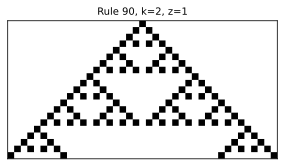

In [2]:
from src.automata import Automata
from src.analysis import Analysis
auto = Automata(41, 20, kind='nearest', output=dir_out, code=90)
auto.do(idx=20, figsize=[5, 2.5])

In [3]:
auto100 = Automata(101, 100, kind='nearest', output=dir_out, code=90)
auto100.do(idx=20, show=False)
# Get output file name
file_out = auto100.output
# Perform analysis

Considerando un solo sito al centro del sistema al passo iniziale, il sistema evolve generando una figura auto similare detta **triangolo di Sierpinski**. Un metodo per verificare se il pattern incontrato è effettivamente un triangolo di Sierpinski è il calcolo della dimensione frattale della figura. Per stimarla con più precisione, consideriamo un sistema di taglia maggiore ($N = 100$) e un'evoluzione temporale per più passi ($N_\text{steps} = 100$).

La stima ottenuta della dimensione frattale per la regola non totalistica 90 e un solo sito inizializzato è compatibile con il valore esatto per il triangolo di Sierpinski, $\log_2(3)$.

In [4]:
ans = Analysis(file_out)
ans.do()
print(f'Fractal dimension: \t {ans.fractal:.3f} ± {ans.fractal_stdev:.3f}')
print(f'Sierpinski dimension: \t {np.log2(3):.3f}')

Fractal dimension: 	 1.570 ± 0.051
Sierpinski dimension: 	 1.585


È altrettanto interessante il comportamento della regola non totalistica $150 = (10010110)_2$. Analogamente alla regola 90, essa è la somma modulo 2 dei siti dell'intorno della cellula, incluso lo stato della cellula centrale stessa.

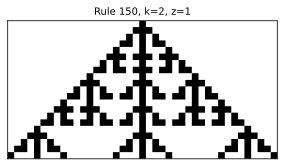

In [5]:
auto = Automata(41, 20, kind='nearest', output=dir_out, code=150)
auto.do(idx=20, figsize=[5, 2.5])

Ponendosi nelle stesse condizioni discusse per la regola 90, anche in questo caso emerge auto similarità nell'evoluzione temporale del sistema. Per quanto la figura sia simile al triangolo di Sierpinski, lo studio della sua dimensione frattale evidenzia la diversa natura del frattale osservato.

In [6]:
auto = Automata(101, 100, kind='nearest', output=dir_out, code=150)
auto.do(idx=20, show=False)
# Get output file name
file_out = auto.output

In [7]:
# Perform analysis
ans = Analysis(file_out)
ans.do()
print(f'Fractal dimension: \t {ans.fractal:.3f} ± {ans.fractal_stdev:.3f}')
print(f'Sierpinski dimension: \t {np.log2(3):.3f}')
print(f'log2(2*phi): \t\t {np.log2(2*(1+np.sqrt(5))/2):.3f}')

Fractal dimension: 	 1.671 ± 0.036
Sierpinski dimension: 	 1.585
log2(2*phi): 		 1.694


La dimensione frattale dell'evoluzione temporale secondo la regola non totalistica 150 è $\log_2(2\phi)$ [SW83], con $\phi = \frac{1+\sqrt{5}}{2}$ valore della sezione aurea.

È possibile inizializzare il sistema in maniera casuale, assegnando a ogni cella la probabilità $p$ di avere stato $1$, e $1-p$ di avere stato $0$. In questo caso, posto $p = 0.5$, studiamo l'evoluzione del sistema per ogni regola, per due *seed* diversi, al fine di analizzare la dipendenza del sistema dalla condizione iniziale.

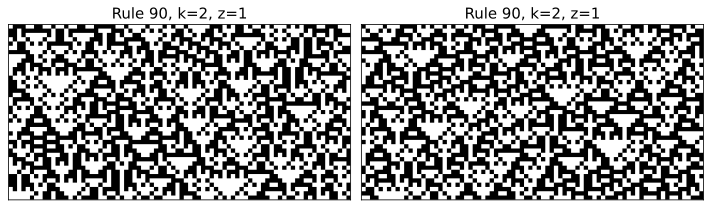

In [8]:
auto = Automata(80, 40, kind='nearest', output=dir_out, code=90, seed=1)
auto.do(show=False)
system1 = auto.cells
auto.clear(seed=2)
auto.do(show=False)
system2 = auto.cells
multiplots([system1, system2], [90, 90], [2, 2], [1, 1], figsize=[10, 5], fontsize=15)

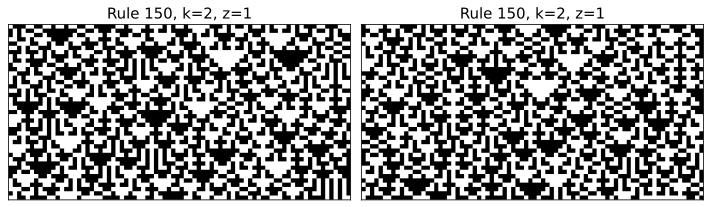

In [9]:
auto = Automata(80, 40, kind='nearest', output=dir_out, code=150, seed=1)
auto.do(show=False)
system1 = auto.cells
auto.clear(seed=2)
auto.do(show=False)
system2 = auto.cells
multiplots([system1, system2], [150, 150], [2, 2], [1, 1], figsize=[10, 5], fontsize=15)

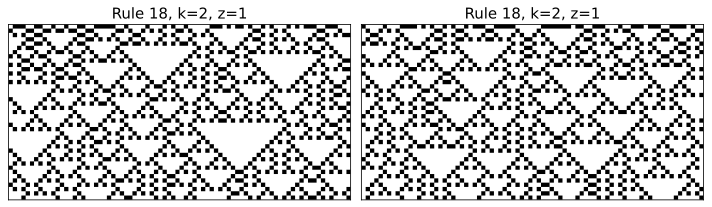

In [10]:
auto = Automata(80, 40, kind='nearest', output=dir_out, code=18, seed=1)
auto.do(show=False)
system1 = auto.cells
auto.clear(seed=2)
auto.do(show=False)
system2 = auto.cells
multiplots([system1, system2], [18, 18], [2, 2], [1, 1], figsize=[10, 5], fontsize=15)

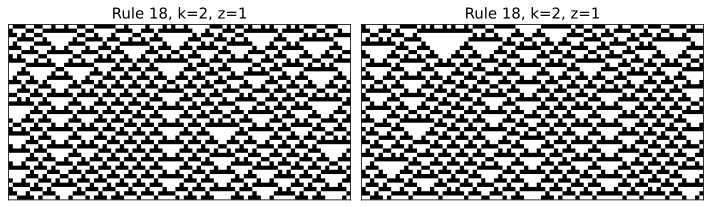

In [11]:
auto = Automata(80, 40, kind='nearest', output=dir_out, code=54, seed=1)
auto.do(show=False)
system1 = auto.cells
auto.clear(seed=2)
auto.do(show=False)
system2 = auto.cells
multiplots([system1, system2], [18, 18], [2, 2], [1, 1], figsize=[10, 5], fontsize=15)

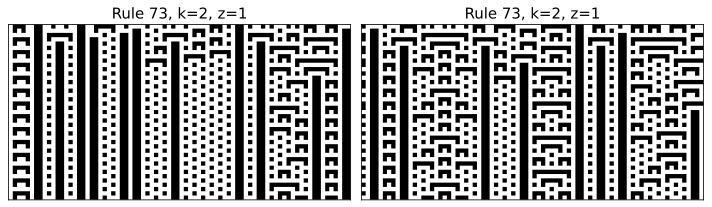

In [12]:
auto73 = Automata(80, 40, kind='nearest', output=dir_out, code=73, seed=1)
auto73.do(show=False)
system731 = auto73.cells
auto73.clear(seed=2)
auto73.do(show=False)
system732 = auto73.cells
multiplots([system731, system732], [73, 73], [2, 2], [1, 1], figsize=[10, 5], fontsize=15)

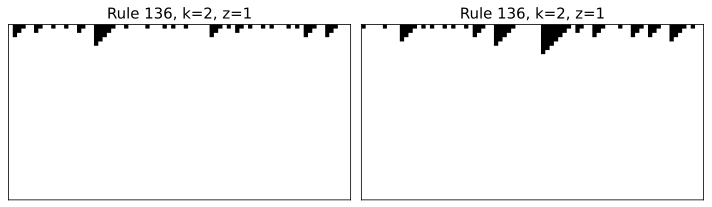

In [13]:
auto = Automata(80, 40, kind='nearest', output=dir_out, code=136, seed=1)
auto.do(show=False)
system1 = auto.cells
auto.clear(seed=2)
auto.do(show=False)
system2 = auto.cells
multiplots([system1, system2], [136, 136], [2, 2], [1, 1], figsize=[10, 5], fontsize=15)

In primo luogo, le regole in esame evidenziano chiaramente le quattro classi principali di regole di evoluzione,

- **classe 1**: il sistema evolve in poche iterazioni verso uno stato costante e uniforme, *e.g.* regola 136
- **classe 2**: il sistema evolve in poche iterazioni verso uno stato periodico o ripetitivo, *e.g.* regola 73
- **classe 3**: il sistema evolve in maniera apparentemente casuale, con la presenza di strutture aperiodiche, *e.g.* regola 150
- **classe 4**: il sistema evolve in maniera apparentemente ordinata, con la presenza di strutture complesse interagenti, *e.g.* regola 18.

Inoltre, una differente inizializzazione del sistema conduce a configurazioni finali con le stesse proprietà, ma con una diversa disposizione delle strutture ordinate emergenti.

È interessante studiare alcuni parametri del sistema al variare della regola considerata. Svolgiamo simulazioni con numero di cellule e numero di passi maggiore (*e.g.* $N = 100, N_\text{steps} = 300$); prima di procedere, effettuiamo una simulazione di *benchmark* con parametri analoghi, tale che ogni sito della configurazione finale assuma stato $s \in \{0, 1 \}$ con probabilità $p = 0.5$ e distribuzione uniforme.

In [14]:
rules = [18, 54, 73, 90, 136, 150]
sys_rules, rhos_rules, rhos_avg_rules, acfs_rules, cum_rules = [], [], [], [], []
for rule in rules:
    # Perform simulation
    auto = Automata(101, 300, kind='nearest', output=dir_out, code=rule, seed=1, md5=True)
    # Uniform initialization
    auto.do(save=True, show=False)
    # Store systems
    sys_rules.append(auto.cells)
    file_out = auto.output
    # Perform analysis and store data
    ans = Analysis(file_out)
    ans.do()
    rhos_rules.append(ans.density[1])
    rhos_avg_rules.append(ans.density_avg[1])
    acfs_rules.append(ans.correlation[-1])
    cum_rules.append(ans.nonzero_cum)

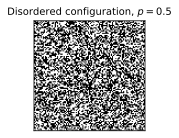

In [15]:
# Perform benchmark
auto_bmk = Automata(101, 300, kind='benchmark', output=dir_out, code=None, seed=1)
auto_bmk.do(save=True, show=False)
bmk_out = auto_bmk.output
ans_bmk = Analysis(bmk_out)
ans_bmk.do()
_ = cellular_plot(auto_bmk.cells[:][:100], title='Disordered configuration, $p = 0.5$', figsize=[2, 2])

In [16]:
rhos_rules.append(ans_bmk.density[1])
rhos_avg_rules.append(ans_bmk.density_avg[1])
acfs_rules.append(ans_bmk.correlation[-1])
cum_rules.append(ans_bmk.nonzero_cum)
x_steps = [np.arange(301) for _ in rhos_rules]
kinds = ['line' for _ in rhos_rules]
labels_rules = [f'Rule {i}' for i in rules]
labels_rules.append('Benchmark')

Studiamo la **densità** di stati diversi da zero, definita come il rapporto fra il numero di stati non nulli sul numero totale di celle al tempo $\tau$, 
$$ \rho(\tau) = \sum_{t=0}^{\tau} \frac{\sum_{s=1}^{k-1} s(t)}{\sum_{s=0}^{k-1} s(t)}.$$

In aggiunta alle regole 18, 73, 136, 150, consideriamo anche la regola 90. Ogni simulazione è stata inizializzata con una distribuzione uniforme di stati; ciò spiega l'origine comune delle curve per le varie regole attorno a $0.5$. Per la simulazione disordinata di *benchmark*, la densità assume il valore costante $0.5$ con minime fluttuazioni statistiche. Per ognuna delle regole, il comportamento a tempi lunghi è costante; perciò, in prima analisi, la densità fornisce un'indicazione della classe alla quale appartiene ciascuna regola. 

Un chiaro esempio è fornito dalla regola 136: la densità tende rapidamente a zero, riflettendo come il sistema sia costituito da stati uniformemente nulli. Similmente, sia la regola 90 che la regola 150 convergono a valori di $\rho_{\infty} \sim 0.5$; entrambe appartengono alla classe 3, ed entrambe manifestano struttura frattale. La regola 54 e 73, che manifestano entrambe struttura ripetitiva appartenente alla classe 2 non convergono allo stesso valore di $\rho_{\infty}$, sebbene non siano eccessivamente distanti fra loro.

Perciò, la densità non permette di identificare univocamente la classe di appartenenza per ogni regola. La classificazione avviene in maniera corretta solamente per sistemi uniformi interamente nulli o unitari, *i.e.* di classe 1.

In [17]:
print('Rule \t Average density \t Large time density')
for rule, rho, rho_avg in zip(rules, rhos_rules, rhos_avg_rules):
    print(f'{rule} \t {rho_avg:.4f} \t\t {rho[-1]:.4f}')

Rule 	 Average density 	 Large time density
18 	 0.2746 		 0.2614
54 	 0.4672 		 0.4672
73 	 0.4676 		 0.4664
90 	 0.5010 		 0.4948
136 	 0.0186 		 0.0033
150 	 0.5054 		 0.5019


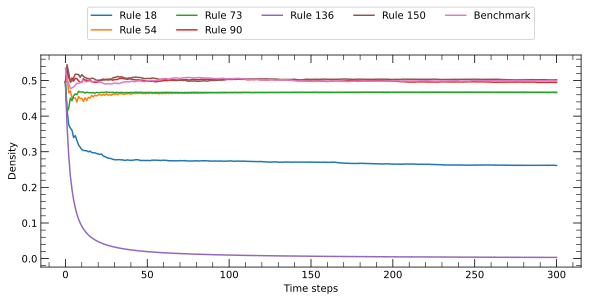

In [18]:
# Plot densities
fig, ax = pltr.plot(x_steps, rhos_rules, kind=kinds, size=[8, 4], xlabel='Time steps', ylabel='Density',\
              label=labels_rules, legend=False, save=False, show=False)
ax.legend(loc='lower center', bbox_to_anchor=(0.5, 1.05), ncol=5)
pltr.show(fig=fig)

Ripetiamo la procedura per sistemi inizializzati con una singola cellula nello stato $s=1$. Rispetto al caso di inizializzazione randomica, emergono comportamenti differenti che permettono di classificare qualitativamente le varie regole. In primo luogo, emergono dei picchi in corrispondenza dei valori $2^n, n \in \mathbb{N}$ per le regole 90, 136, 150. La densità per la regola 73 manifesta oscillazioni significative nei primi passi di simulazione, che sono rapidamente attenuate. In questo caso, la densità converge a un valore pressochè costante; il comportamento oscillatorio può essere indice della periodicità o ripetitività dovuta alla regola.

In questo caso, la densità permette di classificare anche le regole di classe 2. Le regole di classe 3 possono essere individuate dai picchi caratteristici attorno alle potenze di due.

In [19]:
sys_single, rhos_single, rhos_avg_single, acfs_single, cum_single, params_single = [], [], [], [], [], []
for rule in rules:
    # Perform simulation
    auto = Automata(101, 300, kind='nearest', output=dir_out, code=rule, seed=1, md5=True)
    # Single site initialization
    auto.do(idx=50, save=True, show=False)
    # Store systems
    sys_single.append(auto.cells)
    file_out = auto.output
    # Perform analysis and store data
    ans = Analysis(file_out)
    ans.do()
    rhos_single.append(ans.density[1])
    rhos_avg_single.append(ans.density_avg[1])
    acfs_single.append(ans.correlation[-1])
    cum_single.append(ans.nonzero_cum)
    params_single.append(np.polyfit(np.arange(auto.nsteps+1), ans.nonzero_cum, 1, cov=True))

rhos_single.append(ans_bmk.density[1])
rhos_avg_single.append(ans_bmk.density_avg[1])
acfs_single.append(ans_bmk.correlation[-1])
cum_single.append(ans_bmk.nonzero_cum)

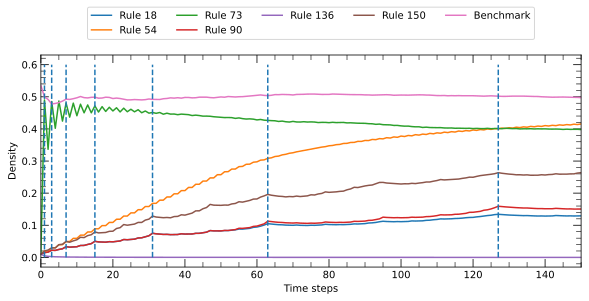

In [20]:
# Plot densities
fig, ax = pltr.plot(x_steps, rhos_single, kind=kinds, size=[8,4], xlabel='Time steps', ylabel='Density',\
              xlim=[0, 150], label=labels_rules, legend=False, save=False, show=False)
ax.vlines([(2**i)-1 for i in range(1, 9)], 0, 0.6, linestyle='dashed')
ax.legend(loc='lower center', bbox_to_anchor=(0.5, 1.05), ncol=5)
pltr.show(fig=fig)

È interessante studiare la funzione di autocorrelazione spaziale a due punti al tempo $\tau$
$$C^{(2)}_{\tau}(r) = \langle S(m)S(m+r)\rangle - \langle S(m) \rangle \langle S(m+r) \rangle,$$
con medie effettuate su tutti i siti del sistema, con $m$ indice del sito e $r$ shift in posizione. La funzione $S(m) = -1$ quando lo stato $s(m) = 1$; $S(m) = 1$ quando $s(m) = 1$. In questo caso, mostriamo la correlazione a tempi lunghi, *i.e.* all'ultimo passo di simulazione $N_step = 300$.

Consideriamo sistemi inizializzati da singolo sito. Il comportamento della regola 136 è banale, essendo il sistema uniformemente nullo (eccetto nei primi siti). Per le regole restanti, è effettuare un confronto con la funzione di autocorrelazione applicata al *benchmark* disordinato; quest'ultima tende rapidamente a zero, con minime fluttuazioni. Emerge in maniera significativa la presenza di correlazioni nei siti $r = 2^n, n \in \mathbb{N}$, manifestate con picchi di intensità decrescente (regola 18, 90). Si osserva il *damping* dei picchi di correlazione nella regola 54; essi si manifestano sia nei siti $r = 2^n, n \in \mathbb{N}$ che a intervalli regolari distanti $\Delta r = 2$. La regola 73 manifesta correlazioni locali, smorzate rapidamente; questo comportamento è ragionevole, considerando la periodicità delle regole di classe 2.

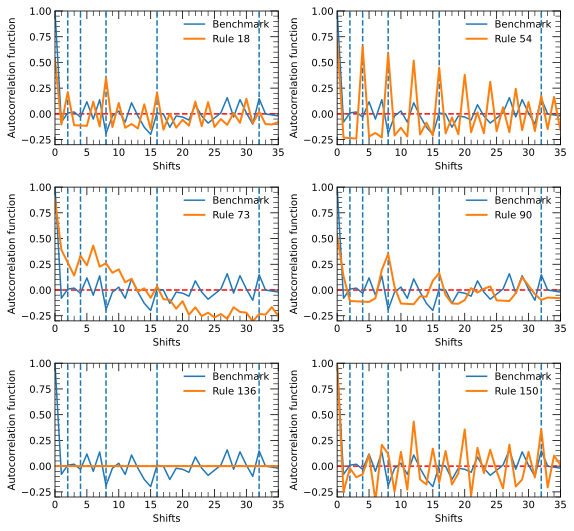

In [21]:
# Plot autocorrelation
x_acf = np.arange(ans_bmk.ncell)
fig, axs = plt.subplots(3, 2, figsize=[8, 7.5])
# Disable axes
for ax in axs.ravel():
    ax.set_axis_off()
for idx, ax in enumerate(axs.ravel()):
    ax.autoscale_view('tight')
    ax.axhline(0, c='r', linestyle='dashed')
    ax.vlines([(2**i) for i in range(1, 7)], -0.3, 1., linestyle='dashed')
    ax.set_xlim([0, 35])
    ax.set_ylim([-0.3, 1])
    ax.plot(x_acf, acfs_single[-1], label='Benchmark')
    ax.plot(x_acf, acfs_single[idx], linewidth=2, label=f'Rule {rules[idx]}')
    ax.set_xlabel('Shifts')
    ax.set_ylabel('Autocorrelation function')
    ax.minorticks_on()
    ax.tick_params(which='both', direction='in', top=True, right=True)
    ax.tick_params(which='major', size=8)
    ax.tick_params(which='minor', size=5)
    ax.legend(frameon=False)
    ax.set_axis_on()
fig.tight_layout()
plt.show()

L'andamento del numero complessivo di siti non nulli rispetto al passo temporale è generalmente lineare. Le regole di classe 3 presentano pendenza simile, mentre la regola 18 presenta una pendenza considerevolmente inferiore. La regola 136 manifesta pendenza nulla, essendo tutti gli stati uniformemente nulli. 

In [22]:
print('Rule \t Slope')
for ri, pi in zip(rules, params_single):
    print(f'{ri} \t {pi[0][0]:.3f} ± {pi[1][0][0]:.3f}')

Rule 	 Slope
18 	 17.185 ± 0.010
54 	 48.645 ± 0.013
73 	 39.202 ± 0.001
90 	 21.930 ± 0.032
136 	 0.000 ± 0.000
150 	 34.785 ± 0.029


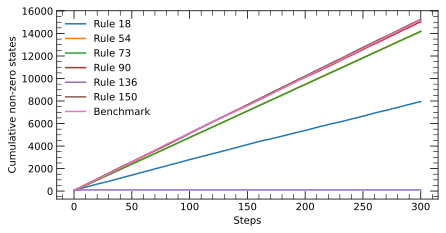

In [23]:
# Plot cumulative
x_cum = np.arange(ans_bmk.nsteps+1)
_ = pltr.plot([x_cum for _ in range(len(rules)+1)], cum_rules, kind=['line' for _ in range(len(rules)+1)],\
              xlabel='Steps', ylabel='Cumulative non-zero states', label=labels_rules,\
              size=[6, 3], legend=True, show=True, save=False)

Procediamo nell'analisi considerando la regola 90 e studiando il comportamento a taglie crescenti del sistema. La densità cala al crescere della taglia del sistema; questo comportamento è dovuto alla presenza di un maggior numero di stati nulli. Analizzando la funzione di correlazione calcolata all'ultimo step temporale si può esaminare una riduzione della frequenza e dell'intensità dei picchi al crescere della taglia del sistema. Il fenomeno può essere attribuito alla presenza delle condizioni al contorno periodiche; nei sistemi di taglia maggiore, a parità di passi di simulazione, gli *effetti di bordo* dovuti alle condizioni toroidali influenzano solamente le cellule più esterne al sistema. In questo modo, le correlazioni a $r = 2^n, n \in \mathbb{N}$ vengono preservate, e vengono soppresse le correlazioni *spurie* presenti nei sistemi di taglia più piccoli. 

In [24]:
sizes = [i + 1 for i in range(50, 350, 50)]
sys_sizes, rhos_sizes, rhos_avg_sizes, acfs_sizes, cum_sizes = [], [], [], [], []
for size in sizes:
    # Perform simulation
    auto = Automata(size, 300, kind='nearest', output=dir_out, code=90, seed=1, md5=True)
    auto.do(idx=int((size-1)/2), save=True, show=False)
    # Store systems
    sys_sizes.append(auto.cells)
    file_out = auto.output
    # Perform analysis and store data
    ans = Analysis(file_out)
    ans.do()
    rhos_sizes.append(ans.density[1])
    rhos_avg_sizes.append(ans.density_avg[1])
    acfs_sizes.append(ans.correlation[-1])
    cum_sizes.append(ans.nonzero_cum)

x_time = [np.arange(301) for _ in rhos_sizes]
x_shift = [np.arange(size) for size in sizes]
kinds_sizes = ['line' for _ in rhos_sizes]
labels_sizes = [f'Size {i-1}' for i in sizes]

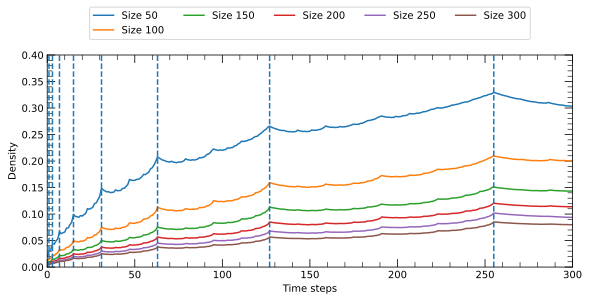

In [25]:
# Plot densities
fig, ax = pltr.plot(x_time, rhos_sizes, kind=kinds_sizes, size=[8, 4], xlabel='Time steps', ylabel='Density',
              xlim=[0, 300], ylim=[0, 0.4], label=labels_sizes, legend=False, save=False, show=False)
ax.vlines([(2**i)-1 for i in range(1, 9)], 0, 0.6, linestyle='dashed')
ax.legend(loc='lower center', bbox_to_anchor=(0.5, 1.05), ncol=5)
pltr.show(fig=fig)

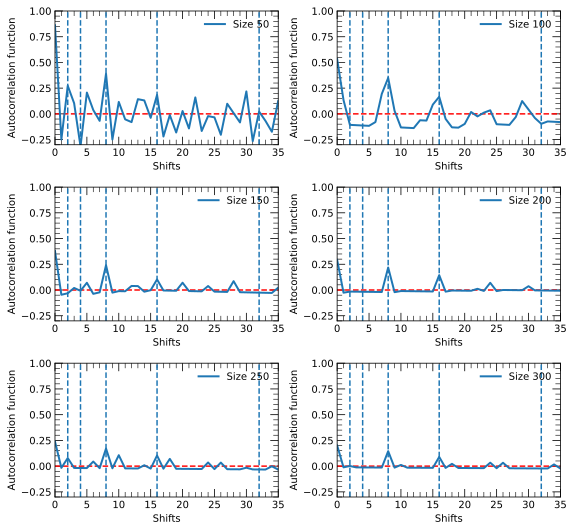

In [26]:
fig, axs = plt.subplots(3, 2, figsize=[8, 7.5])
# Disable axes
for ax in axs.ravel():
    ax.set_axis_off()
for idx, ax in enumerate(axs.ravel()):
    ax.autoscale_view('tight')
    ax.axhline(0, c='r', linestyle='dashed')
    ax.vlines([(2**i) for i in range(1, 7)], -0.3, 1., linestyle='dashed')
    ax.set_xlim([0, 35])
    ax.set_ylim([-0.3, 1])
    ax.plot(x_shift[idx], acfs_sizes[idx], linewidth=2, label=labels_sizes[idx])
    ax.set_xlabel('Shifts')
    ax.set_ylabel('Autocorrelation function')
    ax.minorticks_on()
    ax.tick_params(which='both', direction='in', top=True, right=True)
    ax.tick_params(which='major', size=8)
    ax.tick_params(which='minor', size=5)
    ax.legend(frameon=False)
    ax.set_axis_on()
fig.tight_layout()
plt.show()

## Automi cellulari generalizzati
Superiamo le limitazioni degli automi cellulari elementari. 

### Regole totalistiche
Iniziamo considerando regole totalistiche, le quali considerano la somma degli stati delle cellule nell'intorno della cellula in evoluzione; rimangono invariati il numero di cellule $2z+1$ nell'intorno e il numero di stati per cellula $k$. Il numero di possibili regole totalistiche nel caso particolare $k = 2, z = 1$ è $2^{4} = 16$; essendo un numero relativamente ridotto di codici possibili, è possibile analizzarle caso per caso. Di seguito, le simulazioni sono svolte per $N = 40, N_\text{steps} = 40$ e seed fissato.


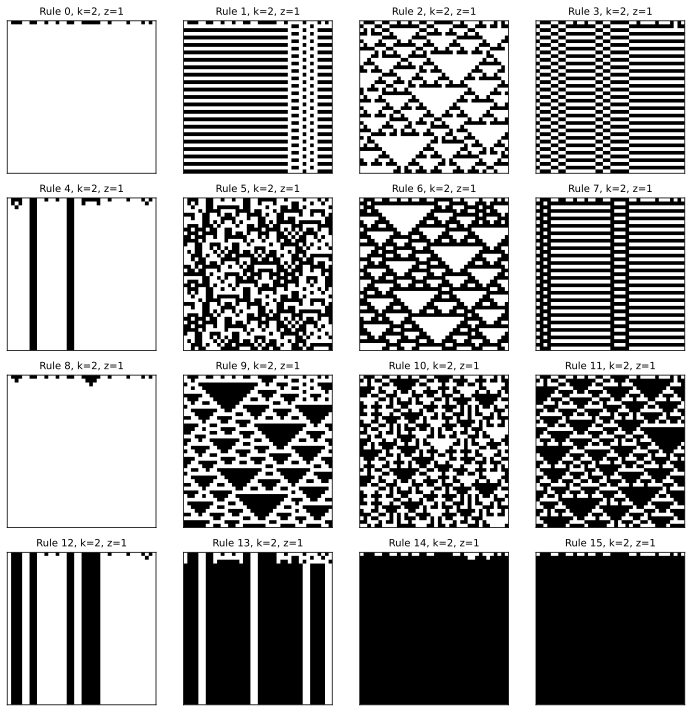

In [27]:
systems = []

for rule in np.arange(0, 16):
    auto = Automata(40, 40, kind='general', output=dir_out, code=rule, seed=1)
    auto.do(save=False, show=False)
    systems.append(auto.cells)

multiplots(systems, np.arange(0, 16), [2 for _ in range(16)], [1 for _ in range(16)], figsize=[10, 10], x=4, y=4)

Anche per le regole totalistiche è possibile sfruttare la precedente suddivisione in classi, ed è possibile ripartire in esse le 16 possibili regole. Per $z = 1, k = 2$ non sono presenti regole di classe 4; inoltre, sono state considerate di classe 3 le regole 2, 6, 9, che manifestano strutture triangolari ripetute, sebbene non periodiche e non interagenti.

| Classe |          Regola         |
|:------:|:-----------------------:|
|    1   | 0, 4, 8, 12, 13, 14, 15 |
|    2   |         1, 3, 7         |
|    3   |   5, 10, 11 (2, 6, 9)   |
|    4   |         Nessuna         |

Ripetiamo la stessa procedura per il caso $z = 2, k = 2$, con $2^6 = 64$ possibili combinazioni, e parametri $N = 40, N_\text{steps} = 40$ e seed fissato.

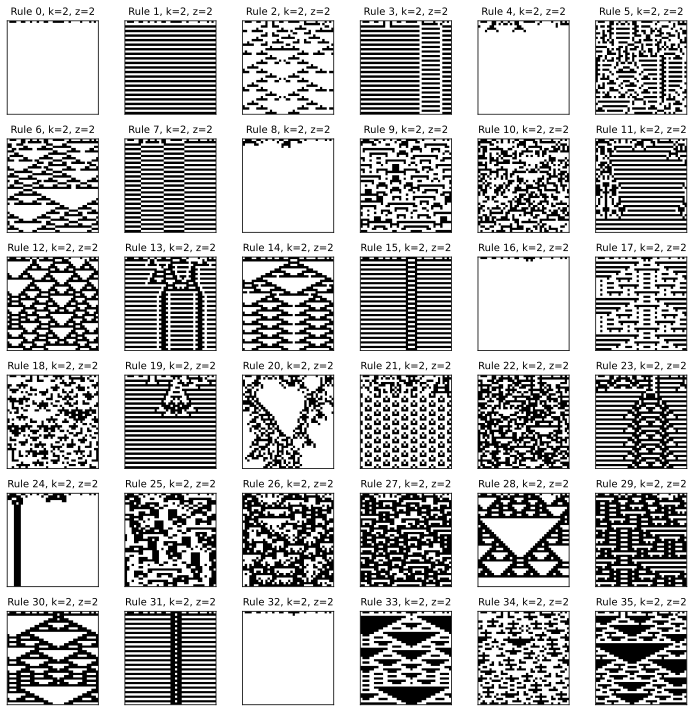

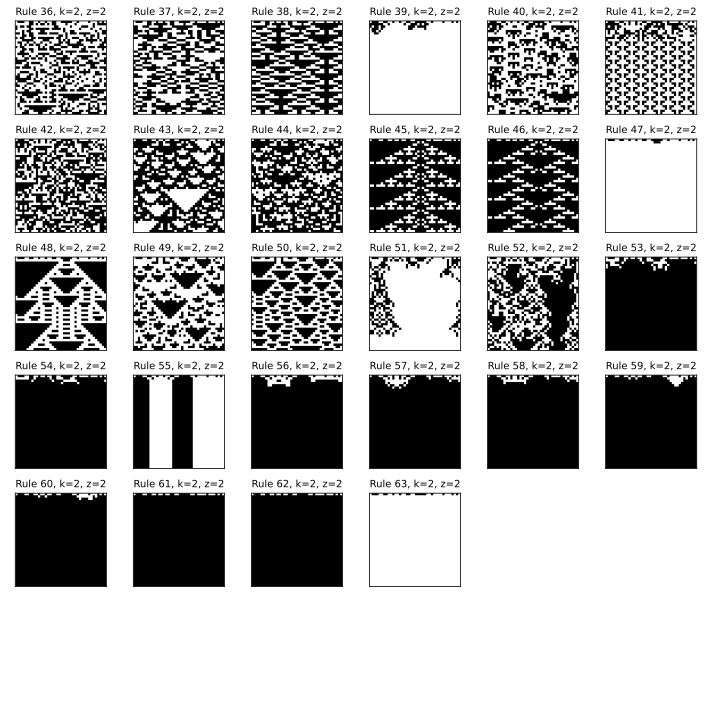

In [28]:
systems = []
for rule in np.arange(0, 65):
    auto = Automata(40, 40, kind='general', neigh_size=2, output=dir_out, code=rule, seed=1)
    auto.do(save=False, show=False)
    systems.append(auto.cells)
multiplots(systems[:36], np.arange(0, 36), [2 for _ in range(36)], [2 for _ in range(36)], figsize=[10, 10], x=6, y=6)
multiplots(systems[37:], np.arange(36, 64), [2 for _ in range(28)], [2 for _ in range(28)], figsize=[10, 10], x=6, y=6)

Anche in questo caso emerge chiaramente la suddivisione in quattro classi. In particolare, le regole 20 e 52 manifestano un comportamento complesso, classificabile nella classe 4. Si possono osservare strutture fortemente ramificate che interagiscono fra loro, dando luogo a pattern ripetitivi (regola 20) o fasce a stato costante (regola 52) in alcune regioni di spazio.

È interessante osservare la presenza di triangoli di Sierpinski anche per regole totalistiche e intorni non elementari; ne sono esempio le regole 2, 6, 14.

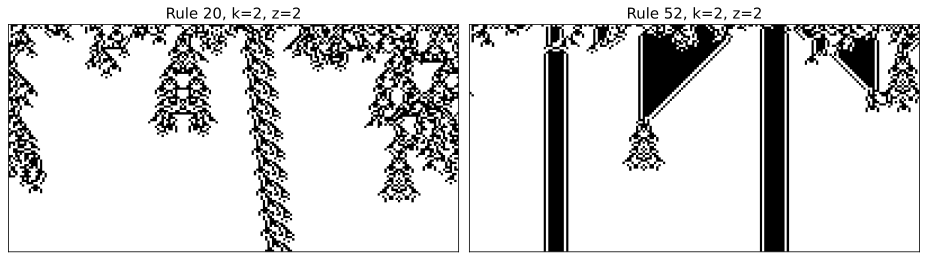

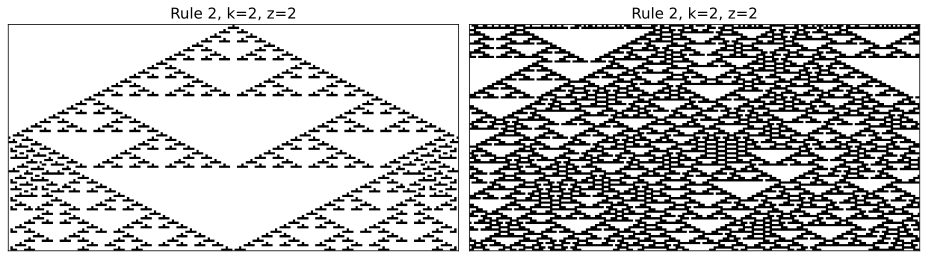

In [29]:
auto20 = Automata(200, 100, kind='general', neigh_size=2, output=dir_out, code=20, seed=1)
auto20.do(save=False, show=False)
auto52 = Automata(200, 100, kind='general', neigh_size=2, output=dir_out, code=52, seed=1)
auto52.do(save=False, show=False)
multiplots([auto20.cells, auto52.cells], [20, 52], [2, 2], [2, 2], figsize=[13, 7], x=1, y=2, fontsize=15)

auto2 = Automata(201, 100, kind='general', neigh_size=2, output=dir_out, code=2, seed=1)
auto2.do(idx = 100, save=False, show=False)
auto2b = Automata(201, 100, kind='general', neigh_size=2, output=dir_out, code=14, seed=1)
auto2b.do(save=False, show=False)
multiplots([auto2.cells, auto2b.cells], [2, 2], [2, 2], [2, 2], figsize=[13, 7], x=1, y=2, fontsize=15)

Per il caso $z = 3, k = 2$, sono possibili $2^{12} = 4096$ combinazioni. Di seguito mostriamo le prime 64 regole, fra le quali è possibile osservare comportamenti attribuibili alle prime tre classi.

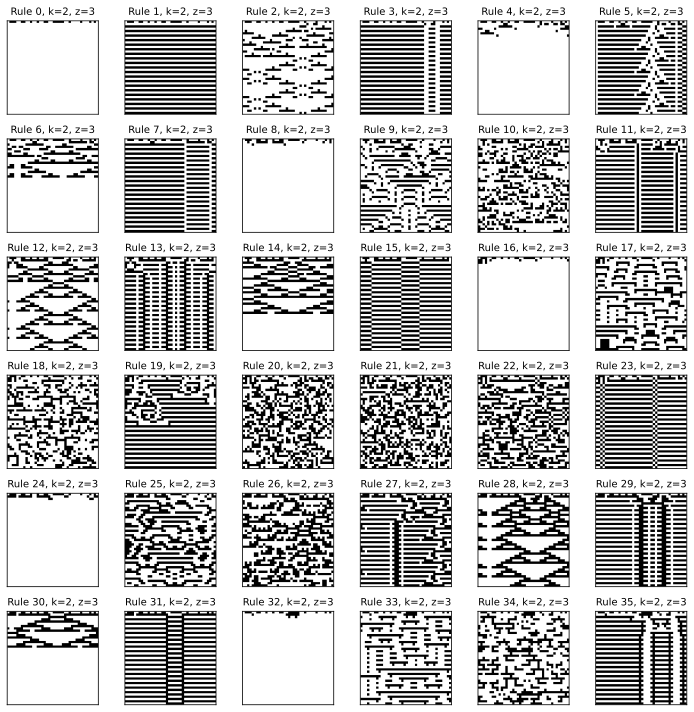

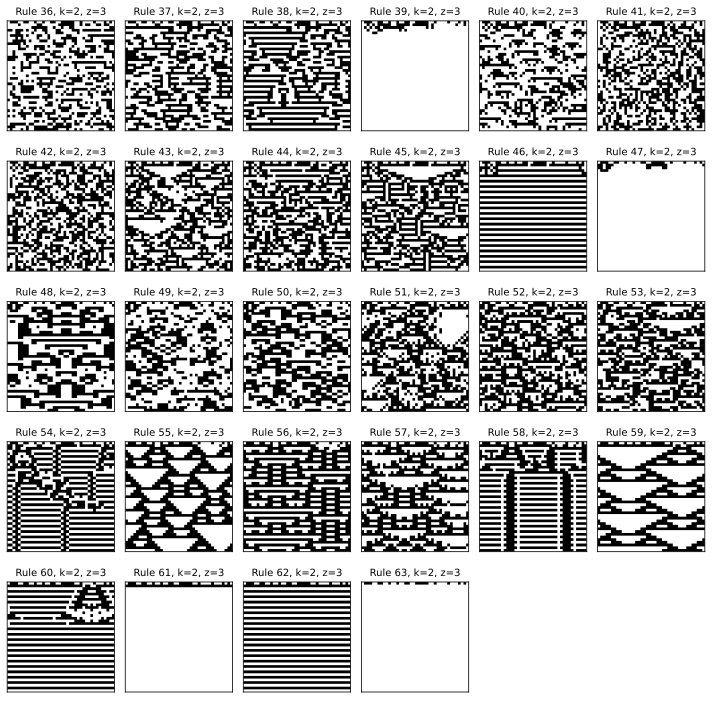

In [30]:
systems = []
for rule in np.arange(0, 65):
    auto = Automata(40, 40, kind='general', neigh_size=3, output=dir_out, code=rule, seed=1)
    auto.do(save=False, show=False)
    systems.append(auto.cells)
multiplots(systems[:36], np.arange(0, 36), [2 for _ in range(36)], [3 for _ in range(36)], figsize=[10, 10], x=6, y=6)
multiplots(systems[37:], np.arange(36, 64), [2 for _ in range(28)], [3 for _ in range(28)], figsize=[10, 10], x=5, y=6)

Ora variamo il numero di stati possibili per cellula. Consideriamo il caso con $k = 3, z = 1$; sono possibili $3^7 = 2187$ combinazioni, delle quali mostriamo le prime 64. Il valore dello stato della cellula è rappresentato usando colori differenti.

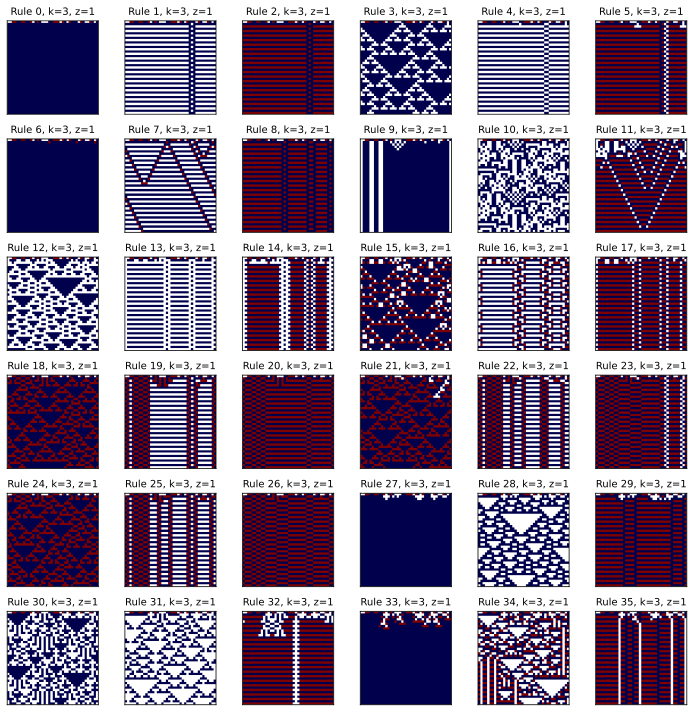

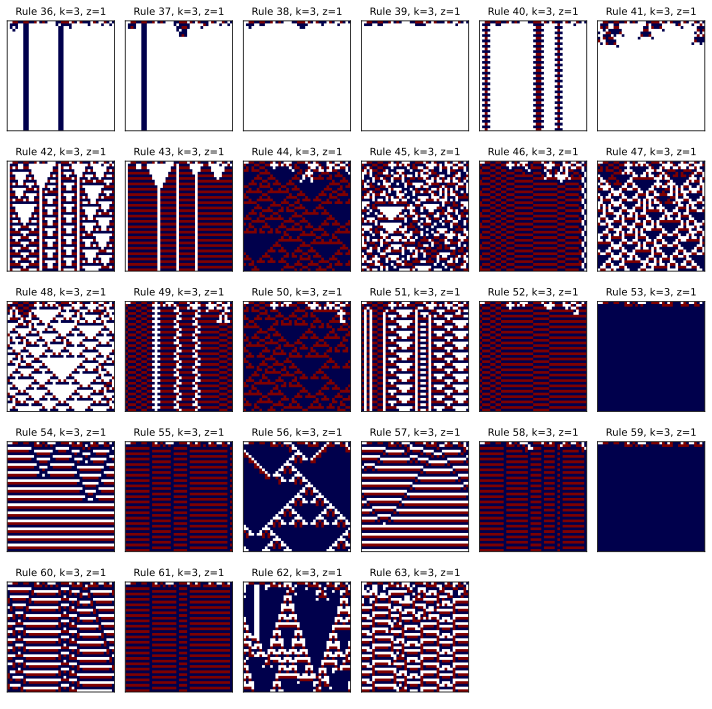

In [33]:
systems = []
for rule in np.arange(0, 65):
    auto = Automata(40, 40, kind='general', neigh_size=1, values=3, output=dir_out, code=rule, seed=1)
    auto.do(save=False, show=False)
    systems.append(auto.cells)
multiplots(systems[:36], np.arange(0, 36), [3 for _ in range(36)], [1 for _ in range(36)], figsize=[10, 10], x=6, y=6)
multiplots(systems[37:], np.arange(36, 64), [3 for _ in range(28)], [1 for _ in range(28)], figsize=[10, 10], x=5, y=6)

Fra i possibili comportamenti osserviamo, come nei casi elementari, sistemi con stato costante e uniforme (*e.g.* regola 0, 6, 38, 53); sistemi periodici (*e.g.* regola 1, 2, 13, 14); sistemi aperiodici (*e.g.* regola 15, 18, 24, 44). È peculiare il comportamento della regola 56 e 62, che presentano strutture estremamente simili ai triangoli di Sierpinski osservati in precedenza. Nel caso della regola 56, i triangoli sono formati da cellule con lo stesso stato, con inclusioni di cellule con stato diverso.

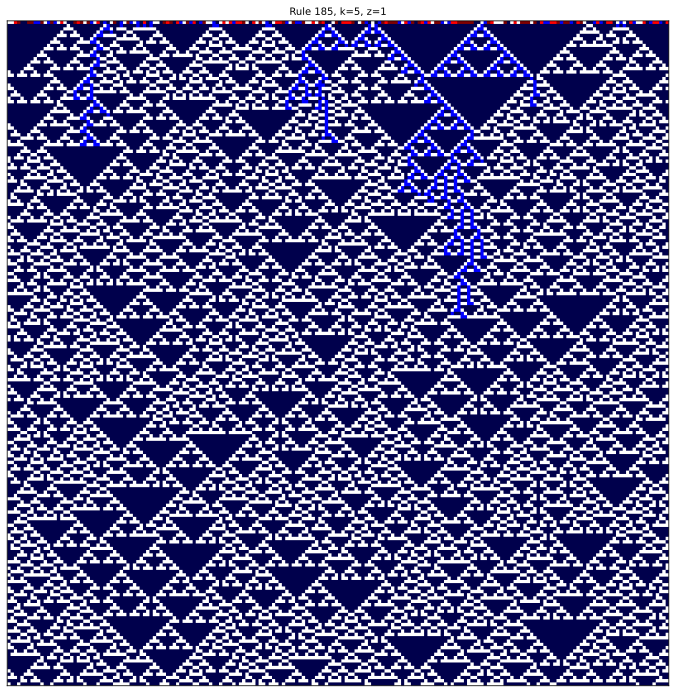

In [32]:
auto = Automata(200, 200, kind='general', neigh_size=1, values=5, output=dir_out, code=185, seed=1)
auto.do(save=False, show=True, figsize=[12, 12])


Una caratteristica peculiare dei sistemi a più stati è la non permanenza degli stati. Consideriamo $k = 5, z=1, N_\text{steps} = 200, N_\text{cell} = 200$ e applichiamo la regola 185; la simulazione è inizializzata con stati uniformi equiprobabili. Nell'evoluzione del sistema, non tutti gli stati presenti all'inizializzazione sono preservati; in questo caso, il numero di stati all'iterazione finale è $k_\text{T} = 2$. 
Un possibile approccio per lo studio sistematico di questo comportamento richiederebbe di svolgere un ragionevole numero di simulazioni a parametri invariati e *seed* differente per ogni regola, con lo scopo di studiare la distribuzione del numero finale di stati osservati.

# Conclusioni
In questo lavoro abbiamo analizzato gli automi cellulari in una dimensione, ponendo particolare attenzione alla dinamica del sistema. Dallo studio degli automi cellulari elementari è emerso un comportamento assolutamente non triviale, ripartibile in quattro differenti classi a seconda della regola di evoluzione scelta. In particolare, le regole di classe 1 generano configurazioni finali uniformi e costanti; le regole di classe 2 evolvono verso configurazioni periodiche o ripetitive; le regole di classe 3 manifestano strutture aperiodiche, spesso di forma triangolare; le regole di classe 4 generano sistemi ordinati, con presenza di strutture interagenti. 

La categorizzazione delle varie regole può essere effettuata avvalendosi della densità di stati non nulli, della funzione di autocorrelazione spaziale a due punti e del numero complessivo di siti non nulli. Per quanto ciascuno dei tre metodi non sia sufficiente per classificare univocamente le possibili regole, la combinazione dei tre fornisce indicazioni sufficienti a tal scopo. In particolare, si evidenzia la presenza di picchi di correlazione e di densità in corrispondenza del passo temporale $t = 2^n, n \in \mathbb{N}$ per regole appartenenti alla classe 3. Banalmente, le regole di classe 1 conducono a funzioni densità costanti nulle o unitarie, a funzioni di autocorrelazione nulle e numero di siti non nulli costante. Le periodicità tipiche delle regole di classe 2 sono locali, come emerge dallo studio della funzione di autocorrelazione. Sono presenti effetti dovuti alla taglia del sistema; le condizioni periodiche al contorno causano picchi di correlazione spuri per i sistemi di taglia inferiore, fortemente ridotti in intensità al crescere del numero di cellule. 

Lo studio effettuato per gli automi cellulari elementari può essere esteso ai casi di regole totalistiche e di cellule con numero di stati $k > 2$. Per le regole totalistiche rimane valida la classificazione effettuata per il caso elementare. Per $z = 1$ non si osservano regole di classe 4, che si manifestano nel caso $z = 2$ con la presenza di strutture *felciformi* fra loro interagenti; alcune regole conducono a configurazioni finali con struttura a triangolo di Sierpinski, tratto costante di tutti i casi studiati. In presenza di cellule con stati non binari emerge il fenomeno della non permanenza degli stati: l'evoluzione del sistema causa la scomparsa di alcuni stati precedentemente espressi. 

# Bibliografia

 - [SW83]: Wolfram, S., Statistical mechanics of cellular automata, Reviews of Modern Physics, American Physical Society (APS), 1983, 55, 601-644